### Problem3.2
#### Multiwell Pressure Drop Modelling
In this part we will model the plane by insertng two wells with Bottomhole pressure of 700 psi each
The grid dimensions were chosen to be 80 in x direction and 40 in y direction. The block length were chosen to be 400m by 400m as described in the task description

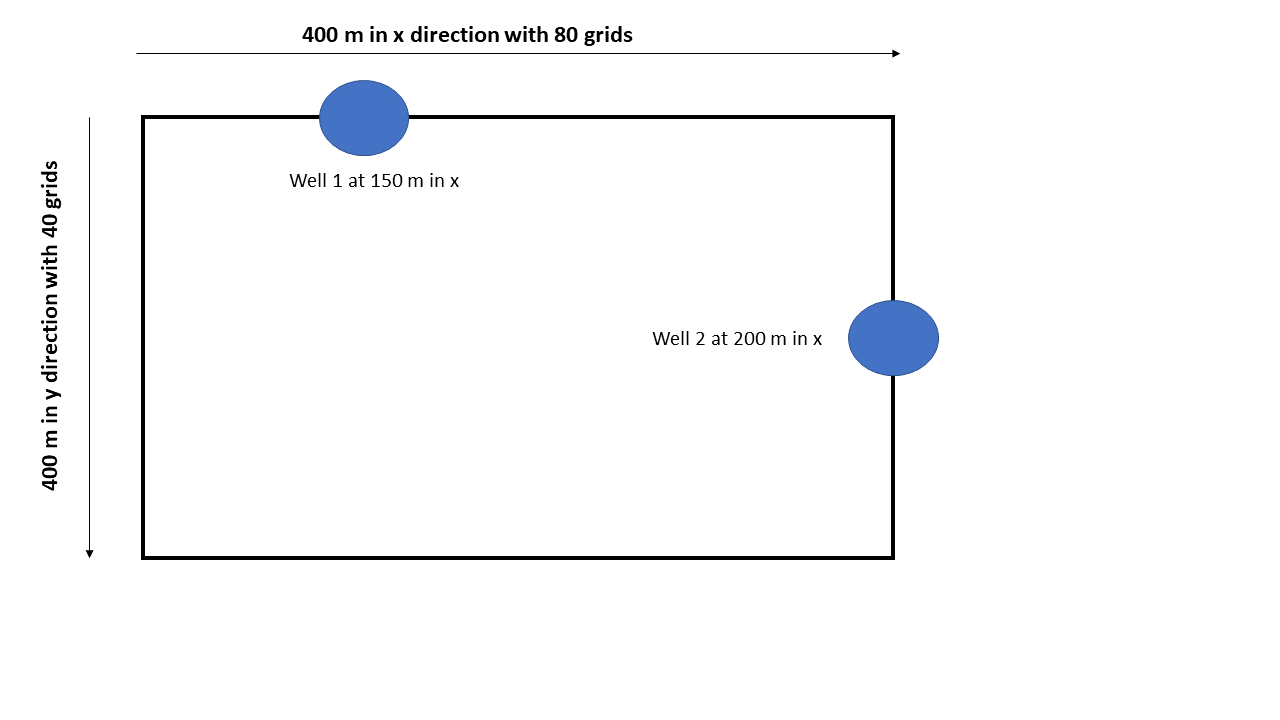

In [34]:
from IPython.display import Image
Image("C:\\Users\\Mirzakhan\\Desktop\\img1.png")

#### Importing Pre-requisite libraries

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### Pre-defining the variables used

In [3]:
col_names = ['x', 'y']
DataFr = pd.DataFrame(columns = col_names)

#Reservoir block dimensions
Lenx = 400
Leny = 400
#-------------------------
N = 80 #Number of Grids in x direction
M = 40 #Number of Grids in y direction

#Length of the grids
dx = Lenx/N
dy = Leny/M
#-------------------------


phi = 0.12 #porosity
perm = 70 * 10**(-15) 
compressibility = 2*10^-9 
myu = 0.004 #Viscosity

W1_P = 700
W2_P = 700

#Determining the spacing of first and second wells in m
w1_x = 150
w1_y = 0

w2_y = 200
w2_x = 400

#Determining the grid of first and second well
iw1 = math.floor((w1_x/Lenx)*N)
jw1 = 0

iw2 = N+1
jw2 = math.floor((w2_y/Leny)*M)
#---------------------------------------------

#Defining boundary Pressures
Pup = 2000
Pleft = 3000
Pright = 3000
Pbase = 2000
#----------------------------------------------

vector = np.zeros(N*M) #Generating vector to solve our cooefficient matrix --> Ax = b ---> x = inv(A)*b
    
A = np.zeros((N*M,N*M)) #Initiating an all zero matrix to locate coefficients of PDE
rows,cols = np.shape(A) #Getting rows and columns of that matrix

#### This code block executes simple matrix setup - diagonal values and pentha diagonal values are insterted to the matrix

In [4]:
#Adding diagonal values to matrix which are -2*(1/dx^2 + 1/dy^2)
for i in range(0,cols):
        for j in range(0,rows):
            if i == j:
                A[i][j] = -2*(1/dx**2 + 1/dy**2)
#----------------------------------------------------------------

#Adding pentha dioganal elements to the matrix
for i in range(0,rows):
    for j in range(0, cols):
        if j - i == 1:
            A[i][j] = 1/(dx**2)
        if i - j == 1:
            A[i][j] = 1/(dx**2)
        if i==j and j + N < cols:
            A[i][j + N] = 1/(dy**2)
        if i==j and i + N <rows:
            A[i + N][j] = 1/(dy**2)
#-----------------------------------------------


#### Creating blocks in the matrix - The algorithm looks for number of x loops

In [5]:
#Making dioganal block inside our matrix by dropping some values around diagonal
c = 0 
count = 0    
count = M - 1

while count>0:
    A[c + N-1, c + N] = 0
    A[c + N, c + N-1] = 0

    c = c + N
    count = count - 1
#------------------------------------------------------------------------------

#### Code Block to make linear combinations of output vector that is right hand side of Ax = b, and values in b are based on boundary values
For the given well position their respective bottomhole pressure were chosen

In [6]:
#Filling the vector defined with the predefined boundary values
d = 0
for j in range(1,M+1):
    for i in range(1, N+1):
        if (i-1==0 and j - 1==0):
            vector[d] = -(Pright/dx**2 + Pup/dy**2)
        if (i-1 != 0 and j-1==0 and i+1<=N):
            vector[d] = -Pup/dy**2
        if (j-1 != 0 and i-1==0 and j+1<=M):
            vector[d] = -Pright/dx**2
        if ((i+1) > N and j-1 == 0):
            vector[d] = -(Pright/dx**2 + Pup/dy**2)
        if ((i-1)==0 and (j+1)>M ):
            vector[d] = -(Pright/dx**2 + Pbase/dy**2)

        if ((i+1)>N and (j+1)>M):
            vector[d] = -(Pleft/dx**2 + Pbase/dy**2)

        if ((i+1)>N and j-1!=0 and j+1<=M):
            vector[d] = -Pright/dx**2
        if ((i-1)!= 0 and (j+1)>M and (i+1)<=N):
            vector[d] = -Pbase/dy**2
        if (i +1>=N and j == jw2):
            vector[d] = -W2_P/dx**2
        #if (j+1==jw2 and i == N-1):
            #vector[d] = -700/dx**2 + 700/dy**2
        if (i == iw1 and j - 1 == jw1):
            vector[d] = -W1_P/dy**2
        #if (i + 1 ==iw1 and j == iw1+1):
            #vector[d] = -700/dx**2 + 700/dy**2
            
        DataFr.loc[d, 'x'] = i
        DataFr.loc[d, 'y'] = j
        d = d + 1 

#Collecting all the coordinates and the solved vector values into a common dataFrame
DataFr['Pressure'] = np.dot(np.linalg.inv(A), vector)
#-----------------------------------------------------------------------------------
nodey = jw2
nodex = N
DataFr.loc[(DataFr['x']==nodex) & (DataFr['y']==nodey),'Pressure'] = 700

nodey = 1
nodex = iw1
DataFr.loc[(DataFr['x']==nodex) & (DataFr['y']==nodey),'Pressure'] = 700
#-----------------------------------------------------------------------------------


#### Plotting the results

<IPython.core.display.Javascript object>


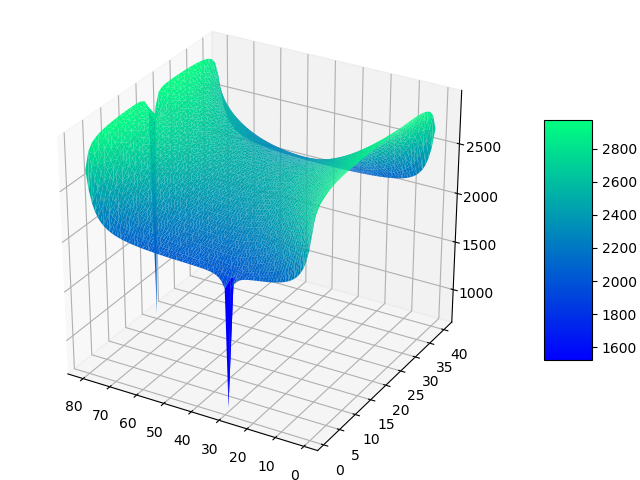

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.invert_xaxis()
surf = ax.plot_trisurf(DataFr.x, DataFr.y, DataFr.Pressure, cmap = cm.winter, linewidth = 0.8 )
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()